# O4

## Problem
DONE! - dataanalyse
<details>
<summary>
Bjarke need these links
</summary>


https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

https://www.tensorflow.org/tutorials/images/classification

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
## Ways to build 

```
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
```
</details>

## Datasæt 
DONE! - dataanalyse

# Valg af ML
* Bruger supervised learning
* Bruger CNN da det er billede data
* Bruger categorical_crossentropy algorith, da vi har flere kategorier eller SparseCategoricalCrossentropy
* Maybe need preprocessed
* Hvordan forholder vi os til over and underfitting
* RandomGridSearch?

## Håndtering af optimering, fordele og ulemper 
* Overfitting/underfitting
* Optimeringsparametre, hyperparameterrummet 
* 






# Load The Data

In [1]:
from keras.preprocessing.image import ImageDataGenerator

def data_augmentation(categories: list, folder: str, batch_size: int):
    datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    generator = datagen.flow_from_directory(
        folder,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',  # Assuming you're using categorical crossentropy
        classes=categories
    )

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    # this is the augmentation configuration we will use for testing:
    # only rescaling
    test_datagen = ImageDataGenerator(rescale=1./255)

    # this is a generator that will read pictures found in
    # subfolers of 'data/train', and indefinitely generate
    # batches of augmented image data
    train_generator = train_datagen.flow_from_directory(
            'data/train',  # this is the target directory
            target_size=(150, 150),  # all images will be resized to 150x150
            batch_size=batch_size,
            class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

    # this is a similar generator, for validation data
    validation_generator = test_datagen.flow_from_directory(
            'data/validation',
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')

    return generator


In [2]:
import cv2, os
from PIL import Image
import numpy as np

def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

# Create histograms

Failed to load image: weather_dataset\Shine\shine131.jpg
Failed to load image: weather_dataset\Rain\rain141.jpg
y_categotical_train shape after reshape: (898, 4)
y_categotical_test shape after reshape: (225, 4)


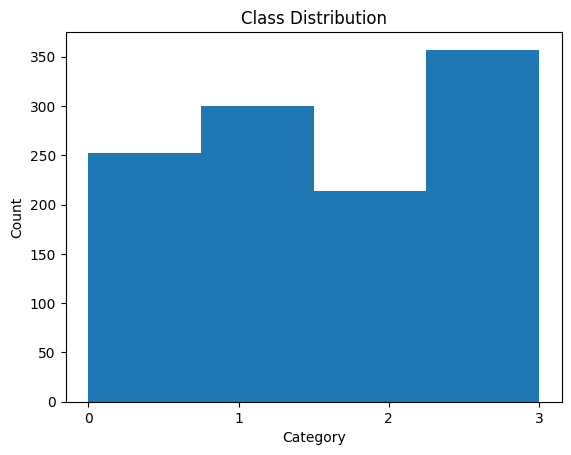

Category for image 0: Shine


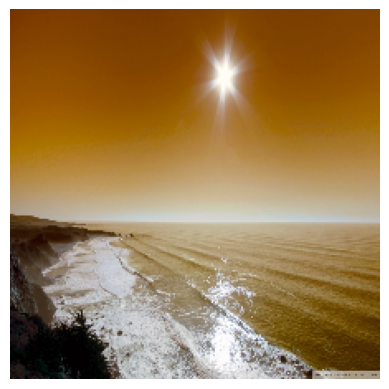

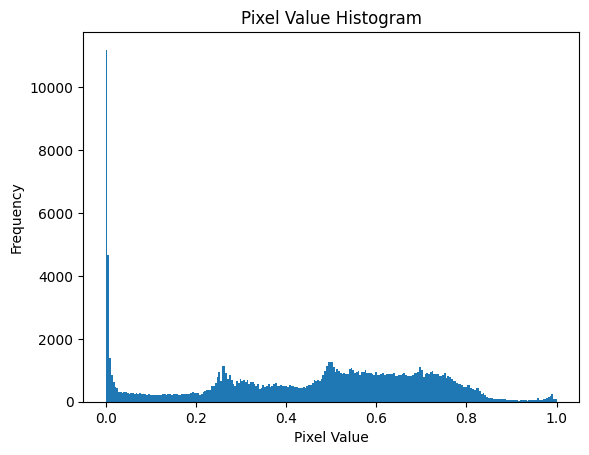

In [47]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

#X is images
#y is labels

X, y = getDataSet(categories, data_folder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

if y_train.ndim == 1 or y_test.ndim == 1:
        y_train = to_categorical(y_train, num_classes=4)
        y_test = to_categorical(y_test, num_classes=4)
        print("y_categotical_train shape after reshape:", y_train.shape)
        print("y_categotical_test shape after reshape:", y_test.shape)

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Use the data_augmentation function to create an augmented data generator

# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(y, bins=len(np.unique(y)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(y))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
print(f"Category for image 0: {categories[y[0]]}")
  
plt.imshow(X[0])
plt.axis('off')  # Optional: Turn off the axis labels and ticks
#plt.title(categories[X[0]])
plt.show()

plt.hist(X[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

# This creates 

In [3]:
from PIL import Image
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator

data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

for category in categories:
    batch_size = 32
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    category_folder = os.path.join(data_folder, category)
    num_images = sum(1 for file in os.listdir(category_folder) if file.endswith('.jpg'))

    for i in range(1, num_images + 1):
        img_path = f'{data_folder}/{category}/{category}{i}.jpg'
        img = load_img(img_path)  
        x = img_to_array(img)   
        x = x.reshape((1,) + x.shape)  

        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `data_augmentation/{category}` directory
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=f'data_augmentation/{category}', save_prefix=category, save_format='jpg'):
            i += 1
            if i > 20:
                break  # otherwise the generator would loop indefinitely




KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


data_folder = "data_augmentation"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

X_aug, y_aug = getDataSet(categories, data_folder)

X_train = np.concatenate((X_train, X_aug))
y_train = np.concatenate((y_train, y_aug))

# Check the shapes

In [6]:
def checkShapeBeforeReshape(train_generator, validation_generator, num_batches=1):
    # Display shapes for the training generator
    for _ in range(num_batches):
        batch_data, batch_labels = next(train_generator)
        print("train_generator batch data shape:", batch_data.shape)
        print("train_generator batch labels shape:", batch_labels.shape)

    # Display shapes for the validation generator
    for _ in range(num_batches):
        batch_data, batch_labels = next(validation_generator)
        print("validation_generator batch data shape:", batch_data.shape)
        print("validation_generator batch labels shape:", batch_labels.shape)

# Call this function after creating your generators
checkShapeBeforeReshape(train_generator, validation_generator, num_batches=1)


train_generator batch data shape: (16, 224, 224, 3)
train_generator batch labels shape: (16,)
validation_generator batch data shape: (16, 224, 224, 3)
validation_generator batch labels shape: (16,)


In [4]:
from tensorflow.keras.utils import to_categorical

def checkShapeBeforeReshape(X_train, y_train, X_test, y_test):
    print("X_train shape before reshape:", X_train.shape)
    print("X_test shape before reshape:", X_test.shape)

    print("y_categotical_train shape before reshape:", y_train.shape)
    print("y_categotical_test shape before reshape:", y_test.shape)


def reshape(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape((X_train.shape[0], 224, 224, 3)).astype('float32') / 255.0
    X_test = X_test.reshape((X_test.shape[0], 224, 224, 3)).astype('float32') / 255.0
    print("X_train shape after reshape:", X_train.shape)
    print("X_test shape after reshape:", X_test.shape)

    if y_train.ndim == 1 or y_test.ndim == 1:
        y_train = to_categorical(y_train, num_classes=4)
        y_test = to_categorical(y_test, num_classes=4)
    print("y_categotical_train shape after reshape:", y_train.shape)
    print("y_categotical_test shape after reshape:", y_test.shape)
    return X_train, y_train, X_test, y_test

checkShapeBeforeReshape(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = reshape(X_train, y_train, X_test, y_test)

X_train shape before reshape: (898, 224, 224, 3)
X_test shape before reshape: (225, 224, 224, 3)
y_categotical_train shape before reshape: (898,)
y_categotical_test shape before reshape: (225,)
X_train shape after reshape: (898, 224, 224, 3)
X_test shape after reshape: (225, 224, 224, 3)
y_categotical_train shape after reshape: (898, 4)
y_categotical_test shape after reshape: (225, 4)


# Create function for later use

In [8]:
def plot_metrics(train_losses, train_accuracies):
    # Format data to np.array for easier use
    train_losses = np.array(train_losses)
    train_accuracies = np.array(train_accuracies)
    
    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
    plt.title('Training Loss Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
    plt.title('Training Accuracy Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_folds(test_accuracies):
     # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Test Accuracy Over Iterations')
    plt.xlabel('KFolds')
    plt.ylabel('Loss')
    plt.legend()

def plot_generalization(n_epochs, folds, val_errors_list, train_errors_list):
    
    for i in range(folds):
        best_epoch = np.argmin(val_errors_list[i])
        best_val_rmse = np.sqrt(val_errors_list[i][best_epoch])

        # plt.figure(figsize=(10,5))
        # plt.annotate('Best model',
        #              xy=(best_epoch, best_val_rmse),
        #              xytext=(best_epoch, best_val_rmse + 1),
        #              ha="center",
        #              arrowprops=dict(facecolor='black', shrink=0.05),
        #              fontsize=16,
        #             )

        # for i in range(n_epochs):
        #     print(f"  epoch={i:4d}, mse_train={train_errors_list[i][i]:4.2f}, mse_val={val_errors_list[i][i]:4.2f}")
        
        #best_val_rmse -= 0.03  # just to make the graph look better
        plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
        plt.plot(np.sqrt(train_errors_list[i]), "b--", linewidth=2, label="Training set")
        plt.plot(np.sqrt(val_errors_list[i]), "g-", linewidth=3, label="Validation set")
        plt.legend(loc="upper right", fontsize=14)
        plt.xlabel("Epoch", fontsize=14)
        plt.ylabel("RMSE", fontsize=14)
        plt.show()

def plot_generalization_kfold(folds, val_errors_list, train_errors_list):
    best_kfold = np.argmin(val_errors_list)
    best_val_rmse = np.sqrt(val_errors_list[best_kfold])

    # plt.figure(figsize=(10,5))
    # plt.annotate('Best model',
    #              xy=(best_epoch, best_val_rmse),
    #              xytext=(best_epoch, best_val_rmse + 1),
    #              ha="center",
    #              arrowprops=dict(facecolor='black', shrink=0.05),
    #              fontsize=16,
    #             )

    # for i in range(n_epochs):
    #     print(f"  epoch={i:4d}, mse_train={train_errors_list[i][i]:4.2f}, mse_val={val_errors_list[i][i]:4.2f}")
    
    #best_val_rmse -= 0.03  # just to make the graph look better
    plt.plot([0, folds], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(train_errors_list), "b--", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors_list), "g-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Kfold", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

def print_Average(test_accuracy, loss_per_fold):
    # Print out average value for the model
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')

# Generate Model

Here we define our different models we wnat to test

#### This is our first own model

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential 

def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5)),
    model.add(Dense(4, activation='softmax'))  # Change to 4 for your 4 classes

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy',"mae"])
    return model


#### Model from the book
We have to make something like this model...  I (Bjarke) am going to test this

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential 

from functools import partial

def createModelFromBook():
    #set_seed(42)  # extra code – ensures reproducibility
    DefaultConv2D = partial(Conv2D, kernel_size=3, padding="same",
                            activation="relu", kernel_initializer="he_normal")
    model = Sequential([
        DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
        MaxPooling2D(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        MaxPooling2D(),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        MaxPooling2D(),
        Flatten(),
        Dense(units=128, activation="relu",
                            kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(units=64, activation="relu",
                            kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(units=4, activation="softmax")
    ])
    # Plot the model
    plot_model(model, to_file='model_plot_from_book.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def alexnet():
    model = Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3), padding='valid'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 2
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 3
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Layer 4
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Layer 5
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the output and add fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming input shape of (224, 224, 3) and 1000 classes
# input_shape = (224, 224, 3)
# num_classes = 1000

# model = alexnet(input_shape, num_classes)
# model.summary()


# Train the model For normal cnn

# Train and evaluate model
Here we create a default set up we are using for each model. We are injecting the model we want to use. This way it is easy to test different models and have to copy paste alot less.

For genderate the picture you have too run the commands:
```
pip install graphiz 
pip install pydot
```

#### Model checking every epochs

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(createModel, X_train, y_train, folds, n_epochs, name):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True)

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors_list, val_errors_list = [], []  # List to store train/validation errors for each fold

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    kfold_index = 0

    for train, val in kfold.split(X_train, y_train.argmax(1)):
        model = createModel()
        kfold_index = kfold_index + 1

        X_train_kfold, X_val_kfold = X_train[train], X_train[val]
        y_train_kfold, y_val_kfold = y_train[train], y_train[val]

        fold_train_losses, fold_train_accuracies = [], []
        fold_train_errors, fold_val_errors = [], []  # List to store train errors/validation for the current fold

        for epoch in range(n_epochs): 
            history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

            fold_train_losses.append(history.history['loss'][0])
            fold_train_accuracies.append(history.history['accuracy'][0])

            # Predict training data
            y_train_pred = model.predict(X_train_kfold, verbose=0)
            mse_train = mean_squared_error(y_train_kfold, y_train_pred)
            fold_train_errors.append(mse_train)

            # Evalutate the model on the validation set
            test_loss, test_accuracy = model.evaluate(X_val_kfold, y_val_kfold)
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)

            # Predict validate data
            y_val_pred = model.predict(X_val_kfold, verbose=0)
            mse_val = mean_squared_error(y_val_kfold, y_val_pred)
            fold_val_errors.append(mse_val)

            # Check if the current model has the lowest validation loss
            if test_loss < best_val_loss:
                best_val_loss = test_loss
                best_model = model
                best_model_info = f'Kfold: {kfold_index}, Epoch: {epoch}'

        train_losses.append(fold_train_losses)
        train_accuracies.append(fold_train_accuracies)
        train_errors_list.append(fold_train_errors)
        val_errors_list.append(fold_val_errors)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors for each fold
    plot_generalization(n_epochs, folds, val_errors_list, train_errors_list)

    print(best_model_info)

    return best_model


def evalute_model(model, name):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    model.save_weights('{name}.h5')
    model_json = model.to_json()
    with open('{name}_model_architecture.json', 'w') as json_file:
        json_file.write(model_json)
    print('------------------------------------------------------------------------')


#### Model for kfolds

In [118]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(createModel, X_train, y_train, folds, n_epochs):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True)

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors_list, val_errors_list = [], []  # List to store train/validation errors for each fold

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    kfold_index = 0

    for train, val in kfold.split(X_train, y_train.argmax(1)):
        model = createModel()
        kfold_index = kfold_index + 1

        X_train_kfold, X_val_kfold = X_train[train], X_train[val]
        y_train_kfold, y_val_kfold = y_train[train], y_train[val]

        fold_train_losses, fold_train_accuracies = [], []
        fold_train_errors, fold_val_errors = [], []  # List to store train errors/validation for the current fold

        for epoch in range(n_epochs): 
            history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

            fold_train_losses.append(history.history['loss'][0])
            fold_train_accuracies.append(history.history['accuracy'][0])

            # Evalutate the model on the validation set
            test_loss, test_accuracy = model.evaluate(X_val_kfold, y_val_kfold)
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)

            # Check if the current model has the lowest validation loss
            if test_loss < best_val_loss:
                best_val_loss = test_loss
                best_model = model
                best_model_info = f'Kfold: {kfold_index}, Epoch: {epoch}'
        
        # Predict training data
        y_train_pred = model.predict(X_train_kfold, verbose=0)
        mse_train = mean_squared_error(y_train_kfold, y_train_pred)
        fold_train_errors.append(mse_train)

        # Predict validate data
        y_val_pred = model.predict(X_val_kfold, verbose=0)
        mse_val = mean_squared_error(y_val_kfold, y_val_pred)
        fold_val_errors.append(mse_val)        

        train_losses.append(fold_train_losses)
        train_accuracies.append(fold_train_accuracies)
        train_errors_list.append(fold_train_errors)
        val_errors_list.append(fold_val_errors)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors for each fold
    plot_generalization_kfold(folds, val_errors_list, train_errors_list)

    print(best_model_info)

    return best_model


def evalute_model(model):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    model.save_weights('ss.h5')
    model_json = model.to_json()
    with open('model_architecture.json', 'w') as json_file:
        json_file.write(model_json)
    print('------------------------------------------------------------------------')

## Load model and keep training

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

def retrain_and_evaluate_model(model, X_train, y_train, n_epochs, pre_best_model):
    # Load the pre-trained model using tf.keras.models.load_model

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors, val_errors = [], []

    best_model = None
    best_val_loss = pre_best_model
    best_model_info = ""

    # Clone the model and optimizer
    cloned_model = tf.keras.models.clone_model(model)
    cloned_model.set_weights(model.get_weights())

    cloned_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set the learning rate

    cloned_model.compile(optimizer=cloned_optimizer, loss='mse', metrics=['accuracy'])

    for epoch in range(n_epochs):
        # Train the model on the entire training set
        history = cloned_model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=0)

        # Record training metrics
        train_losses.append(history.history['loss'][0])
        train_accuracies.append(history.history['accuracy'][0])

        # Evaluate the model on the entire dataset
        test_loss, test_accuracy = cloned_model.evaluate(X_train, y_train)
        test_accuracies.append(test_accuracy)
        test_losses.append(test_loss)

        # Check if the current model has the lowest validation loss
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            best_model = cloned_model
            best_model_info = f'Epoch: {epoch}'

        # Predict training data
        y_train_pred = cloned_model.predict(X_train, verbose=0)
        mse_train = mean_squared_error(y_train, y_train_pred)
        train_errors.append(mse_train)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors
    # plot_generalization(train_errors, val_errors)

    print(best_model_info)

    return best_model


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

def train_and_evaluate_model_nonfolds(model, X_train, y_train, n_epochs, name):
    # Load the pre-trained model using tf.keras.models.load_model

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors, val_errors = [], []

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    model = model()

    for epoch in range(n_epochs):
        # Train the model on the entire training set
        with tf.device('/device:GPU:0'):
            tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)))
            history = model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=0)

            # Record training metrics
            train_losses.append(history.history['loss'][0])
            train_accuracies.append(history.history['accuracy'][0])

            # Evaluate the model on the entire dataset
            test_loss, test_accuracy = model.evaluate(X_train, y_train)
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)

            # Check if the current model has the lowest validation loss
            if test_loss < best_val_loss:
                best_val_loss = test_loss
                best_model = model
                best_model_info = f'Epoch: {epoch}'

            # Predict training data
            y_train_pred = model.predict(X_train, verbose=0)
            mse_train = mean_squared_error(y_train, y_train_pred)
            train_errors.append(mse_train)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors
    # plot_generalization(train_errors, val_errors)

    print(best_model_info)

    return best_model

def evalute_model(model, name):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    model.save_weights('{name}.h5')
    model_json = model.to_json()
    with open('{name}_model_architecture.json', 'w') as json_file:
        json_file.write(model_json)
    print('------------------------------------------------------------------------')

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from sklearn.metrics import mean_squared_error

def train_and_evaluate_model_nonfolds(model, X_train, y_train, n_epochs, name):
    # Load the pre-trained model using tf.keras.models.load_model

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors, val_errors = [], []

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    model = model()


        # Train the model on the entire training set
    with tf.device('/device:GPU:0'):
        tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)))
        model.fit(
                train_generator,
                steps_per_epoch=len(X_train) // batch_size,
                epochs=n_epochs,
                validation_data=validation_generator,
                validation_steps=len(X_test) // batch_size)

         # Record training metrics
        # train_losses.append(history.history['loss'])
        # train_accuracies.append(history.history['accuracy'])

        # Evaluate the model on the entire dataset
        test_loss, test_accuracy = model.evaluate(X_train, y_train)
        test_accuracies.append(test_accuracy)
        test_losses.append(test_loss)

        # Check if the current model has the lowest validation loss
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            best_model = model
            

        # Predict training data
        y_train_pred = model.predict(X_train, verbose=0)
        mse_train = mean_squared_error(y_train, y_train_pred)
        train_errors.append(mse_train)

    print_Average(test_accuracies, test_losses)

    #plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors
    # plot_generalization(train_errors, val_errors)

    print(best_model_info)

    return best_model

def evalute_model(model, name):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    model.save_weights(f'{name}.h5')
    model_json = model.to_json()
    with open(f'{name}_model_architecture.json', 'w') as json_file:
        json_file.write(model_json)
    print('------------------------------------------------------------------------')

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(createModel, X_train, y_train, folds, n_epochs, name):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True)

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors_list, val_errors_list = [], []  # List to store train/validation errors for each fold

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    kfold_index = 0

    for train, val in kfold.split(X_train, y_train.argmax(1)):
        model = createModel()
        kfold_index = kfold_index + 1

        X_train_kfold, X_val_kfold = X_train[train], X_train[val]
        y_train_kfold, y_val_kfold = y_train[train], y_train[val]

        fold_train_losses, fold_train_accuracies = [], []
        fold_train_errors, fold_val_errors = [], []  # List to store train errors/validation for the current fold

        with tf.device('/device:GPU:0'):
            tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)))
        #history = 
            model.fit(
                train_generator,
                steps_per_epoch=len(X_train) // batch_size,
                epochs=n_epochs,
                validation_data=validation_generator,
                validation_steps=len(X_val_kfold) // batch_size)

            # fold_train_losses.append(history.history['loss'][0])
            # fold_train_accuracies.append(history.history['accuracy'][0])

            # Predict training data
            y_train_pred = model.predict(X_train_kfold, verbose=0)
            mse_train = mean_squared_error(y_train_kfold, y_train_pred)
            fold_train_errors.append(mse_train)

            # Evalutate the model on the validation set
            test_loss, test_accuracy = model.evaluate(X_val_kfold, y_val_kfold)
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)

            # Predict validate data
            y_val_pred = model.predict(X_val_kfold, verbose=0)
            mse_val = mean_squared_error(y_val_kfold, y_val_pred)
            fold_val_errors.append(mse_val)

            # Check if the current model has the lowest validation loss
            if test_loss < best_val_loss:
                best_val_loss = test_loss
                best_model = model

        train_losses.append(fold_train_losses)
        train_accuracies.append(fold_train_accuracies)
        train_errors_list.append(fold_train_errors)
        val_errors_list.append(fold_val_errors)
        tf.keras.backend.clear_session()

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors for each fold
    plot_generalization(n_epochs, folds, val_errors_list, train_errors_list)

    print(best_model_info)

    return best_model


def evalute_model(model, name):
    model.save_weights(f'{name}.h5')
    model_json = model.to_json()
    with open(f'{name}_model_architecture.json', 'w') as json_file:
        json_file.write(model_json)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    print('------------------------------------------------------------------------')


## Test models

### Test own first model
I know this is a stupid name for this section, but it is just for have multiple test in this file and later on can delete the model we don't wont to use.

In [41]:
model = train_and_evaluate_model_nonfolds(createModel, X_train, y_train, n_epochs=100, name="firstmodel")
evalute_model(model, name="firstmodel")


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/1000
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3870 - accuracy: 0.2789

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 9s 119ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3870 - accuracy: 0.2789 - val_loss: 1.3770 - val_accuracy: 0.2991
Epoch 2/1000
56/56 [==============================] - 7s 124ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3762 - accuracy: 0.3141 - val_loss: 1.3795 - val_accuracy: 0.2991
Epoch 3/1000
56/56 [==============================] - 7s 130ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3717 - accuracy: 0.3333 - val_loss: 1.3733 - val_accuracy: 0.2991
Epoch 4/1000
56/56 [==============================] - 7s 119ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3728 - accuracy: 0.3141 - val_loss: 1.3732 - val_accuracy: 0.2991
Epoch 5/1000
56/56 [==============================] - 6s 113ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3695 - accuracy: 0.3311 - val_loss: 1.3738 - val_accuracy: 0.2991
Epoch 6/1000
56/56 [==============================] - 6s 117ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3747 - accuracy: 

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.3229398727416992 (+- 0.0)
> Loss: 1.532933926263737

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.29777777194976807 (+- 0.0)
> Loss: 1.5333203734291925
------------------------------------------------------------------------


### Model from the book

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3567 - accuracy: 0.3288

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 7s 105ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3567 - accuracy: 0.3288 - val_loss: 1.3635 - val_accuracy: 0.4625
Epoch 2/100
56/56 [==============================] - 6s 116ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2806 - accuracy: 0.3968 - val_loss: 1.3672 - val_accuracy: 0.2875
Epoch 3/100
56/56 [==============================] - 7s 119ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3618 - accuracy: 0.3367 - val_loss: 1.2274 - val_accuracy: 0.3125
Epoch 4/100
56/56 [==============================] - 7s 118ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2779 - accuracy: 0.3810 - val_loss: 1.3999 - val_accuracy: 0.2875
Epoch 5/100
56/56 [==============================] - 6s 115ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.1599 - accuracy: 0.4773 - val_loss: 1.0959 - val_accuracy: 0.7250
Epoch 6/100
56/56 [==============================] - 6s 112ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0205 - accuracy: 0.538

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3887 - accuracy: 0.2914

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 7s 102ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3887 - accuracy: 0.2914 - val_loss: 1.3759 - val_accuracy: 0.2875
Epoch 2/100
56/56 [==============================] - 7s 125ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3083 - accuracy: 0.3764 - val_loss: 1.0514 - val_accuracy: 0.4875
Epoch 3/100
56/56 [==============================] - 7s 126ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.1101 - accuracy: 0.5045 - val_loss: 0.8977 - val_accuracy: 0.5500
Epoch 4/100
56/56 [==============================] - 7s 127ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0170 - accuracy: 0.5567 - val_loss: 0.9078 - val_accuracy: 0.4750
Epoch 5/100
56/56 [==============================] - 7s 123ms/step - batch: 27.5000 - size: 15.7500 - loss: 0.8900 - accuracy: 0.6134 - val_loss: 0.7114 - val_accuracy: 0.7750
Epoch 6/100
56/56 [==============================] - 7s 122ms/step - batch: 27.5000 - size: 16.0000 - loss: 0.9167 - accuracy: 0.626

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3900 - accuracy: 0.2902

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 6s 97ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3901 - accuracy: 0.2902 - val_loss: 1.3750 - val_accuracy: 0.2875
Epoch 2/100
56/56 [==============================] - 6s 114ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3764 - accuracy: 0.3107 - val_loss: 1.3593 - val_accuracy: 0.2875
Epoch 3/100
56/56 [==============================] - 6s 114ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2130 - accuracy: 0.3095 - val_loss: 1.0010 - val_accuracy: 0.5750
Epoch 4/100
56/56 [==============================] - 6s 116ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0860 - accuracy: 0.5034 - val_loss: 0.9713 - val_accuracy: 0.5875
Epoch 5/100
56/56 [==============================] - 6s 114ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0353 - accuracy: 0.5658 - val_loss: 0.9393 - val_accuracy: 0.6250
Epoch 6/100
56/56 [==============================] - 6s 111ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0304 - accuracy: 0.5340

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.2897 - accuracy: 0.3753

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 7s 105ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2897 - accuracy: 0.3753 - val_loss: 0.9571 - val_accuracy: 0.5000
Epoch 2/100
56/56 [==============================] - 7s 121ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2696 - accuracy: 0.3878 - val_loss: 0.9525 - val_accuracy: 0.4875
Epoch 3/100
56/56 [==============================] - 7s 120ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0015 - accuracy: 0.5488 - val_loss: 0.8533 - val_accuracy: 0.7250
Epoch 4/100
56/56 [==============================] - 7s 127ms/step - batch: 27.5000 - size: 16.0000 - loss: 1.0133 - accuracy: 0.5580 - val_loss: 0.7825 - val_accuracy: 0.5125
Epoch 5/100
56/56 [==============================] - 7s 127ms/step - batch: 27.5000 - size: 15.7500 - loss: 0.8886 - accuracy: 0.6190 - val_loss: 0.8844 - val_accuracy: 0.6250
Epoch 6/100
56/56 [==============================] - 12s 221ms/step - batch: 27.5000 - size: 15.5000 - loss: 0.8683 - accuracy: 0.62

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3263 - accuracy: 0.3787

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 6s 97ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3263 - accuracy: 0.3787 - val_loss: 0.9959 - val_accuracy: 0.5375
Epoch 2/100
56/56 [==============================] - 6s 112ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0602 - accuracy: 0.5397 - val_loss: 1.0324 - val_accuracy: 0.5875
Epoch 3/100
56/56 [==============================] - 6s 113ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0021 - accuracy: 0.5510 - val_loss: 0.9200 - val_accuracy: 0.6250
Epoch 4/100
56/56 [==============================] - 6s 113ms/step - batch: 27.5000 - size: 15.7500 - loss: 0.9560 - accuracy: 0.5805 - val_loss: 0.8441 - val_accuracy: 0.6375
Epoch 5/100
56/56 [==============================] - 6s 109ms/step - batch: 27.5000 - size: 15.7500 - loss: 0.8498 - accuracy: 0.6406 - val_loss: 1.1060 - val_accuracy: 0.5125
Epoch 6/100
56/56 [==============================] - 6s 111ms/step - batch: 27.5000 - size: 15.7500 - loss: 0.9226 - accuracy: 0.5805

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3904 - accuracy: 0.2902

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 11s 166ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3904 - accuracy: 0.2902 - val_loss: 1.3772 - val_accuracy: 0.2875
Epoch 2/100
56/56 [==============================] - 9s 161ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3687 - accuracy: 0.3435 - val_loss: 1.2890 - val_accuracy: 0.6250
Epoch 3/100
56/56 [==============================] - 8s 145ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.1930 - accuracy: 0.4717 - val_loss: 1.1754 - val_accuracy: 0.4250
Epoch 4/100
56/56 [==============================] - 9s 167ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.0870 - accuracy: 0.4932 - val_loss: 1.0031 - val_accuracy: 0.6000
Epoch 5/100
56/56 [==============================] - 10s 170ms/step - batch: 27.5000 - size: 16.0000 - loss: 0.8848 - accuracy: 0.6138 - val_loss: 0.9503 - val_accuracy: 0.6125
Epoch 6/100
56/56 [==============================] - 9s 164ms/step - batch: 27.5000 - size: 15.5000 - loss: 0.9745 - accuracy: 0.5

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3891 - accuracy: 0.2800

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 11s 168ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3891 - accuracy: 0.2800 - val_loss: 1.3747 - val_accuracy: 0.2875
Epoch 2/100
56/56 [==============================] - 10s 185ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3770 - accuracy: 0.3197 - val_loss: 1.3729 - val_accuracy: 0.2875
Epoch 3/100
56/56 [==============================] - 11s 189ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3733 - accuracy: 0.3243 - val_loss: 1.3708 - val_accuracy: 0.2875
Epoch 4/100
56/56 [==============================] - 10s 177ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3681 - accuracy: 0.3277 - val_loss: 1.3687 - val_accuracy: 0.2875
Epoch 5/100
56/56 [==============================] - 10s 177ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3737 - accuracy: 0.3152 - val_loss: 1.3682 - val_accuracy: 0.2875
Epoch 6/100
56/56 [==============================] - 10s 177ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3672 - accuracy:

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.3697 - accuracy: 0.3005

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 6s 96ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3697 - accuracy: 0.3005 - val_loss: 1.3769 - val_accuracy: 0.2875
Epoch 2/100
56/56 [==============================] - 7s 131ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3781 - accuracy: 0.3152 - val_loss: 1.3712 - val_accuracy: 0.2875
Epoch 3/100
56/56 [==============================] - 8s 136ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3746 - accuracy: 0.3095 - val_loss: 1.3688 - val_accuracy: 0.2875
Epoch 4/100
56/56 [==============================] - 7s 122ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3736 - accuracy: 0.3254 - val_loss: 1.3670 - val_accuracy: 0.2875
Epoch 5/100
56/56 [==============================] - 6s 113ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3709 - accuracy: 0.3288 - val_loss: 1.3660 - val_accuracy: 0.2875
Epoch 6/100
56/56 [==============================] - 8s 148ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3707 - accuracy: 0.3186

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.2978 - accuracy: 0.3265

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 8s 120ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2977 - accuracy: 0.3265 - val_loss: 1.1042 - val_accuracy: 0.5000
Epoch 2/100
56/56 [==============================] - 9s 168ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.4024 - accuracy: 0.3095 - val_loss: 1.3765 - val_accuracy: 0.3250
Epoch 3/100
56/56 [==============================] - 8s 140ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3776 - accuracy: 0.2925 - val_loss: 1.3699 - val_accuracy: 0.2875
Epoch 4/100
56/56 [==============================] - 7s 126ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3732 - accuracy: 0.3209 - val_loss: 1.3673 - val_accuracy: 0.2875
Epoch 5/100
56/56 [==============================] - 8s 150ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3721 - accuracy: 0.3231 - val_loss: 1.3697 - val_accuracy: 0.2875
Epoch 6/100
56/56 [==============================] - 8s 138ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.3690 - accuracy: 0.320

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/100
56/56 [==============================] - ETA: 0s - batch: 27.5000 - size: 15.7500 - loss: 1.2442 - accuracy: 0.3923

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


56/56 [==============================] - 11s 167ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.2441 - accuracy: 0.3923 - val_loss: 0.9904 - val_accuracy: 0.6000
Epoch 2/100
56/56 [==============================] - 10s 182ms/step - batch: 27.5000 - size: 16.0000 - loss: 0.9913 - accuracy: 0.5435 - val_loss: 0.9280 - val_accuracy: 0.6125
Epoch 3/100
56/56 [==============================] - 10s 174ms/step - batch: 27.5000 - size: 15.5000 - loss: 0.9752 - accuracy: 0.5576 - val_loss: 1.0505 - val_accuracy: 0.5500
Epoch 4/100
56/56 [==============================] - 9s 167ms/step - batch: 27.5000 - size: 15.7500 - loss: 0.9501 - accuracy: 0.5680 - val_loss: 0.8359 - val_accuracy: 0.6125
Epoch 5/100
56/56 [==============================] - 8s 147ms/step - batch: 27.5000 - size: 15.7500 - loss: 1.1738 - accuracy: 0.4399 - val_loss: 1.3837 - val_accuracy: 0.2250
Epoch 6/100
56/56 [==============================] - 8s 146ms/step - batch: 27.5000 - size: 16.0000 - loss: 1.4054 - accuracy: 0.

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.41755303740501404 (+- 0.10135536640882492)
> Loss: 645.614084097461


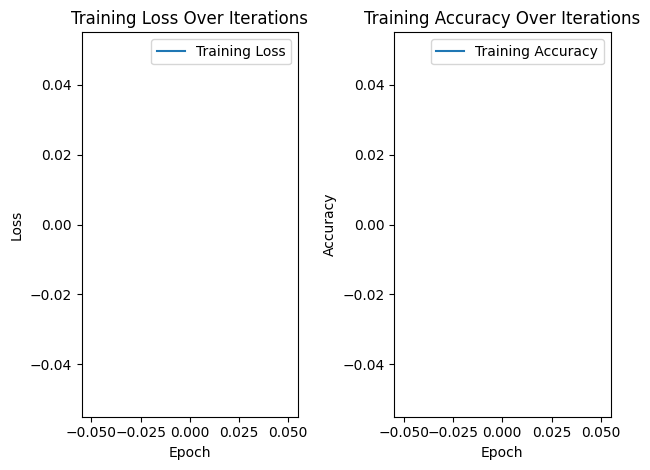

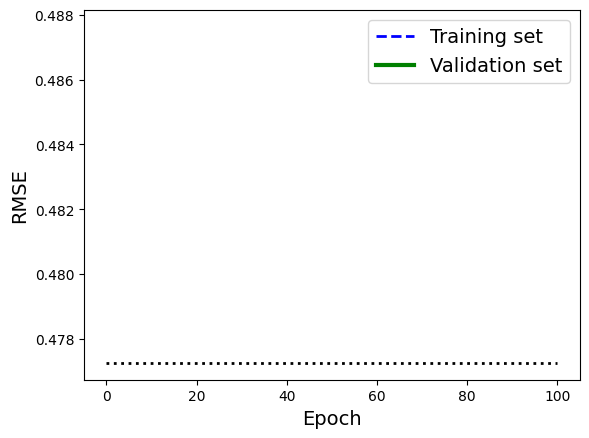

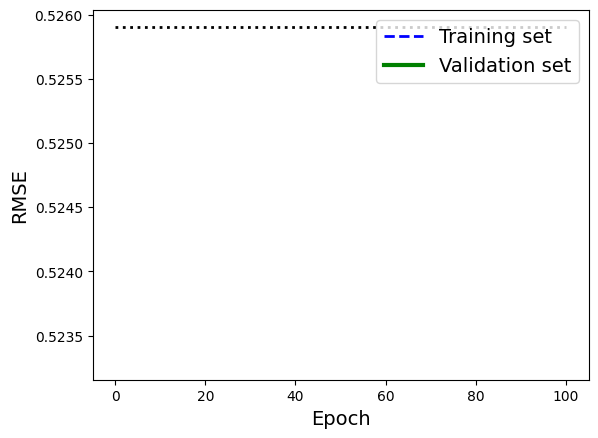

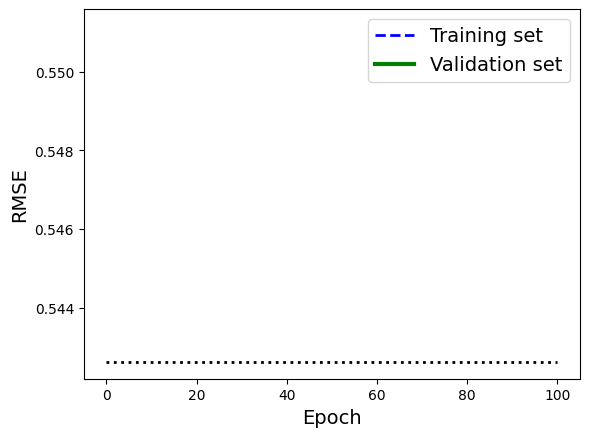

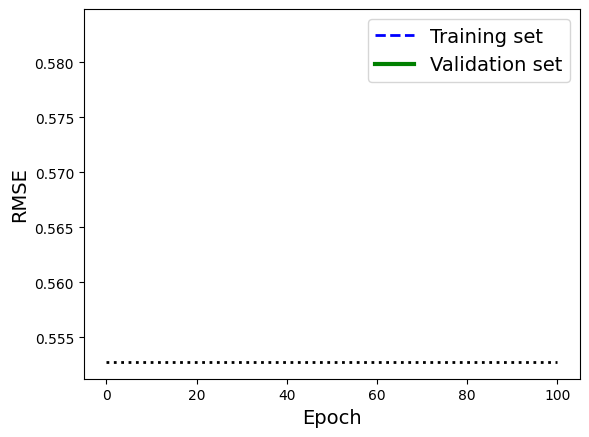

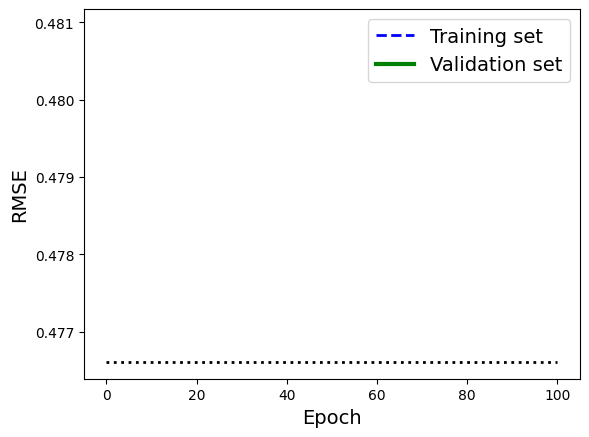

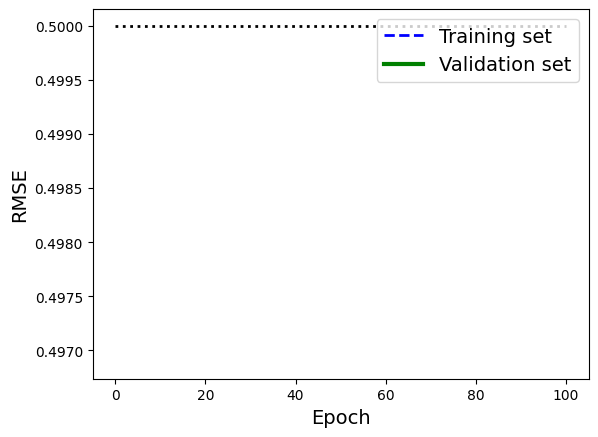

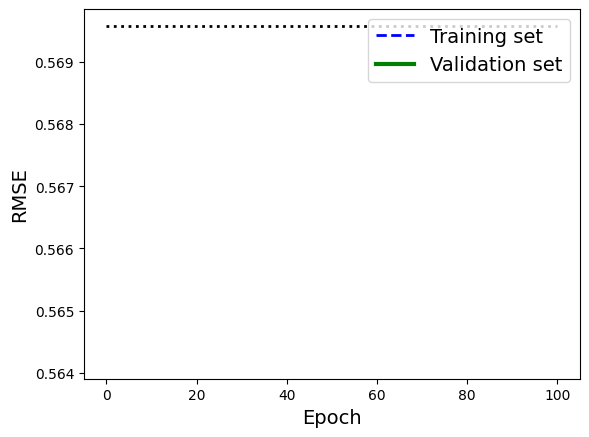

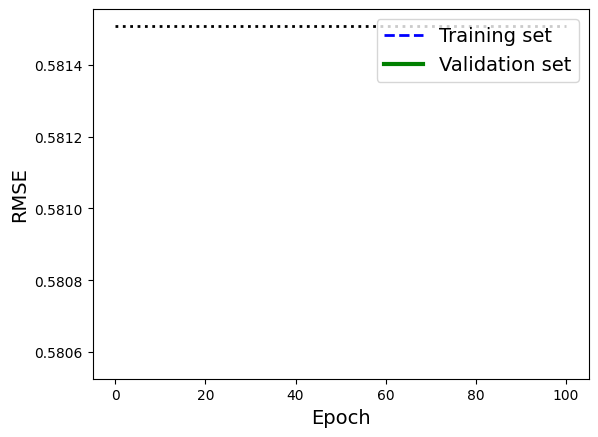

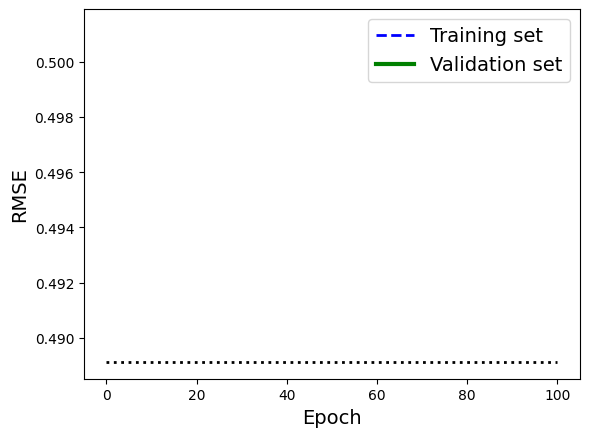

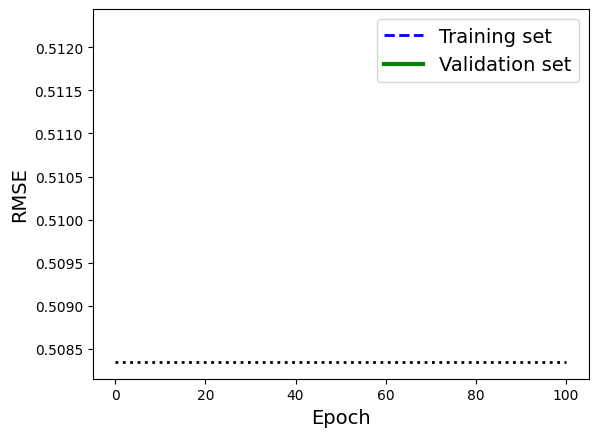

ValueError: Argument `fetch` = <tf.Variable 'conv2d/kernel:0' shape=(7, 7, 3, 64) dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("conv2d/kernel/Read/ReadVariableOp:0", shape=(7, 7, 3, 64), dtype=float32) is not an element of this graph.)

In [29]:
model = train_and_evaluate_model(createModelFromBook, X_train, y_train, folds=10, n_epochs=100, name="modelbook")
evalute_model(model, name="modelbook")

In [44]:
cloned_optimizer = getModel(name="firstmodel")

evalute_model(cloned_optimizer, name="firstmodel")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 128)     

#### second run

43/43 [==============================] - 35s 806ms/step - loss: 0.8938 - accuracy: 0.4916
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.38927633315324783 (+- 0.11502604714770942)
> Loss: 1.214195728302002


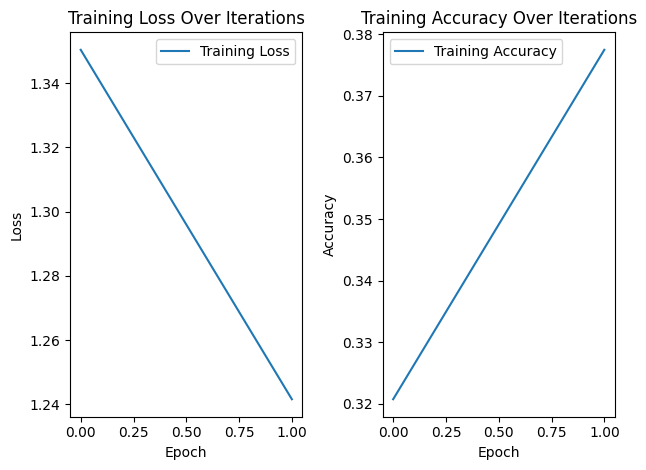

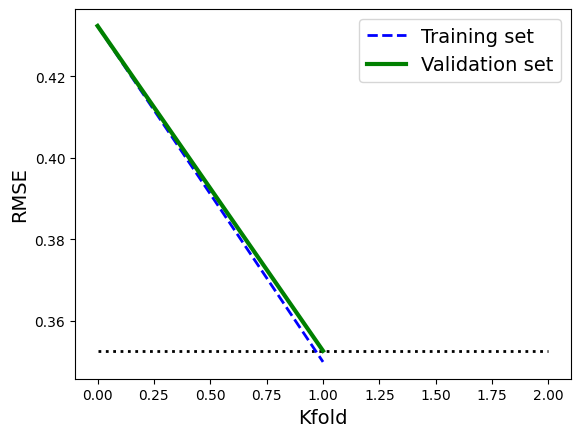

Kfold: 2, Epoch: 1
8/8 [==============================] - 6s 715ms/step - loss: 0.8404 - accuracy: 0.5200
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.5199999809265137 (+- 0.0)
> Loss: 0.8403763771057129
------------------------------------------------------------------------


In [108]:
model = train_and_evaluate_model(createModelFromBook, X_train, y_train, folds=2, n_epochs=2)
evalute_model(model)

86/86 [==============================] - 81s 944ms/step - loss: 0.0795 - accuracy: 0.7397
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.6994507476687432 (+- 0.06053067767812993)
> Loss: 0.09187960289418698


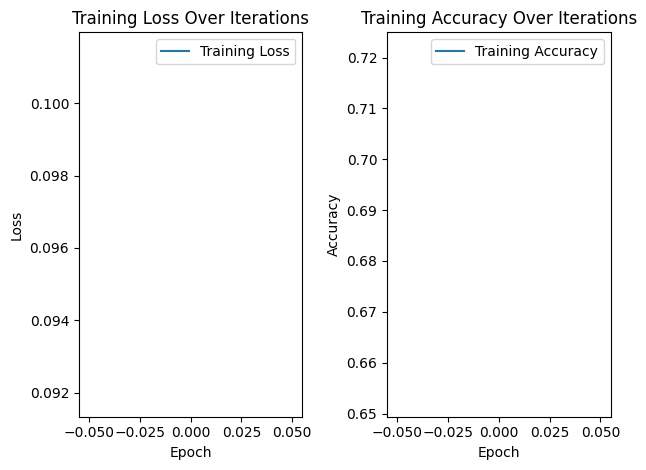

TypeError: plot_generalization() missing 2 required positional arguments: 'val_errors_list' and 'train_errors_list'

In [117]:
from keras.models import load_model, model_from_json


with open('model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('first_try.h5')

# Load initial best validation loss from the saved model
loaded_model.get_config().get('initial_best_val_loss', (float('inf')))

model = retrain_and_evaluate_model(loaded_model, X_train, y_train, n_epochs=20, pre_best_model=0)
evalute_model(model)

# Print a summary of the model
#model.summary()


### AlexNet

In [5]:
from tensorflow.python.client import device_lib
import tensorflow as tf

print(device_lib.list_local_devices())
print(tf.config.list_physical_devices('GPU'))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9231343675564350031
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5849284608
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1477175293353826682
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [21]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# Rest of your code goes here


Physical devices cannot be modified after being initialized


In [50]:
#alexnetModel = alexnet((224, 224, 3), 4)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



model = train_and_evaluate_model(alexnet, X_train, y_train, folds=30, n_epochs=300, name="alexnet")
evalute_model(model, name="alexnet")

Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/300
28/28 [==============================] - ETA: 0s - batch: 13.5000 - size: 30.9286 - loss: 7.4401 - accuracy: 0.6178

ValueError: Empty training data.

In [30]:
def getModel(name):
    from keras.models import load_model, model_from_json

    with open(f'{name}_model_architecture.json', 'r') as json_file:
        loaded_model_json = json_file.read()

    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(f'{name}.h5')

    # Load initial best validation loss from the saved model
    #loaded_model.get_config().get('initial_best_val_loss', (float('inf')))
    cloned_model = tf.keras.models.clone_model(loaded_model)
    cloned_model.set_weights(loaded_model.get_weights())
   
    cloned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cloned_model.summary()
    return cloned_model

 #cloned_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set the learning rate
# Print a summary of the model
#model.summary()


In [46]:

cloned_optimizer = getModel(name="alexnet")

evalute_model(cloned_optimizer, name="alexnet")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_15 (Bat  (None, 26, 26, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                      

In [19]:

model = train_and_evaluate_model_nonfolds(alexnet, X_train, y_train, n_epochs=10, name="alexnet")
evalute_model(model, name="alexnet")


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/1000
7/7 [==============================] - 8s 423ms/step - batch: 3.0000 - size: 128.0000 - loss: 7.0411 - accuracy: 0.5067 - val_loss: 1.5574 - val_accuracy: 0.2891
Epoch 2/1000
7/7 [==============================] - 4s 720ms/step - batch: 3.0000 - size: 92.0000 - loss: 22.5021 - accuracy: 0.5466 - val_loss: 1.9406 - val_accuracy: 0.2891
Epoch 3/1000
7/7 [==============================] - 5s 696ms/step - batch: 3.0000 - size: 110.0000 - loss: 5.1844 - accuracy: 0.6156 - val_loss: 3.3851 - val_accuracy: 0.4453
Epoch 4/1000
7/7 [==============================] - 5s 716ms/step - batch: 3.0000 - size: 110.0000 - loss: 4.8775 - accuracy: 0.6468 - val_loss: 2.5391 - val_accuracy: 0.3984
Epoch 5/1000
7/7 [==============================] - 6s 849ms/step - batch: 3.0000 - size: 128.0000 - loss: 1.3935 - accuracy: 0.7087 - va

c:\Users\Bjarke\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.22383072972297668 (+- 0.0)
> Loss: 1660369.785077951

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.2266666740179062 (+- 0.0)
> Loss: 1653084.5611111112
------------------------------------------------------------------------
